# 5.2 Monte Carlo Methods

Simulate something many times to get probabilities   
Simulations have to be random, in example of cards have to set up cards randomly, not same hand every time  
Have to be enough simulations to be able to make a reasonable prediction  
Don't get exact answer but get some sense as to how likely to win  


### Monte Carlo come in where it's hard to get a real analytic solution so want an approximation

# 5.3 Computing Pi



In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [6,6]

num_samples = 5000
xs = np.random.random(num_samples)
ys = np.random.random(num_samples)

# square of distance between origin and point
dist_sq = xs**2 + ys**2

# check if in circle
# To be in the circle the distance from the origin has to be less than 1. 
# That is the same as the square of the distance being greater than 1. 
# less than 1 in circle, greater than 1 outside circle
# dist_sq = array, checking all values, True or False
test_in_circle = (dist_sq < 1)


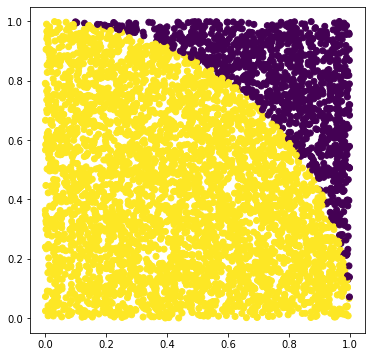

In [17]:
# print scatter plot
plt.scatter(x = xs, y = ys, c = dist_sq < 1)

In [18]:
# get count of number of darts in circle 
count = np.count_nonzero(test_in_circle)

# get ratio of in circle to total then multiply by 4 to get full area of circle
pi_est = count/num_samples * 4
print(pi_est)

3.1192


In [19]:
def pi_random(num_samples):
    results = []
    i = 0
    count = 0
    while (i < num_samples):
        i = i + 1
        x = np.random.random()
        y = np.random.random()
        count += (x**2 + y**2 < 1)
        results.append(count/i * 4)
    return results

# get running estimate of pi, keeps calculating estimate after each sample calculation

<AxesSubplot:>

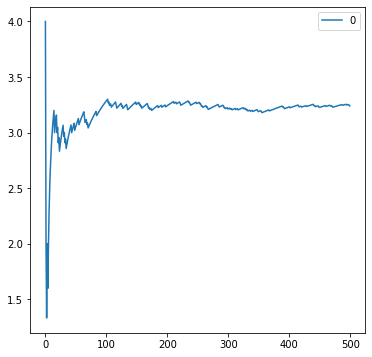

In [20]:
pi_df = pd.DataFrame(pi_random(500))
pi_df.plot()

# 5.4 Randomness & Noise

Do the same thing but with futures, throw a 1000 futures into it.  
Ex. Going to make a trade, going to put a stop limit, how likely am I for my trade to stop out?  

Create a model for the prediction and model for the noise, how much uncertainty in prediction
Model 1000 of them and 5 stop out, so 5 in 1000 chance of stopping out. 

The sunspot example of one thing looking at the next thing to predict the next and so on doesn't actually work that well.  
Need to have this sense of tehir being scope within each step that gives that noise.  

In [21]:
# randn produces standard normal distribution 0 at mean, 1 for std
# (2,5) => 2 rows 5 columns
# 2 steps, 5 trajectories
noise = np.random.randn(2,5)
print(noise)

[[ 0.27406504 -1.07567402  0.27683484  0.92137704  1.38658312]
 [ 0.57731199  0.41455845  1.62701982 -0.21742832 -0.60623861]]


[[ 0.27406504 -1.07567402  0.27683484  0.92137704  1.38658312]
 [ 0.85137703 -0.66111557  1.90385465  0.70394872  0.78034451]]


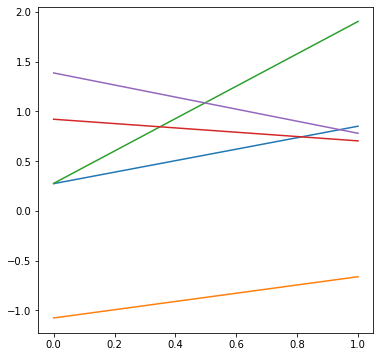

In [22]:
# plot the time step trajectories as move from one value to the next for each column
values = np.cumsum(noise, axis=0)
print(values)
plt.plot(values)
plt.show()

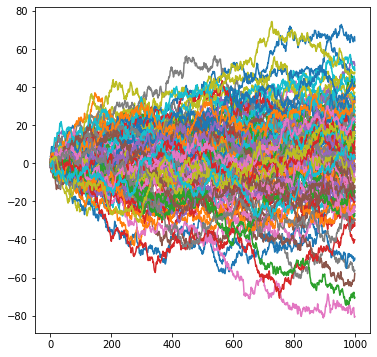

In [23]:
# do again but with 1000 to see overall difference
# 1000 steps, 100 trajectories
noise2 = np.random.randn(1000,100)
values2 = np.cumsum(noise2, axis=0)
plt.plot(values2)
plt.show()

Cone shaped because looking at the std which is the sqrt of the variance  
Things tend to be linear in the variance  
Std is a sqrt, plot shows what the sqrt looks like in a function  

If want to know how likely to be under -20, then add up the total under -20 as proportion of whole  

### Distribution of results
probability density function from above  
looks like a normal distribution overall  
more you add the more normal it should be


<AxesSubplot:ylabel='Density'>

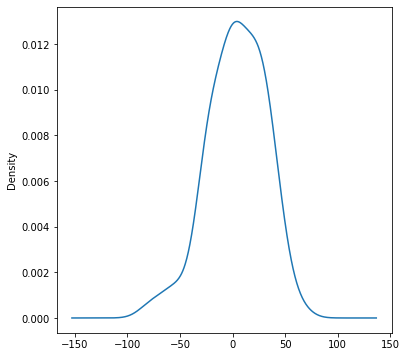

In [24]:
pd.Series(values2[-1,:]).plot.kde()

# 5.5 AR and Monte Carlo

Look at Bitcoin data at point where BC was going up quickly  

Calumns are trajectories / samples  
Rows = points in time, steps



In [25]:
num_samples = 5

# coeffs come from previously trained AR(4) model on BC dataset
coeffs = np.fromiter([-0.01429453, -0.01714329, 0.08005192 ,0.95304314], dtype=float)
# get number of coeffs = p || AR(4) = 4
num_coeffs = coeffs.shape[0]

# each column (# samples) going to be a trajectory
# each row (# coeffs) is a point in time
# go to iterate next point, use last 4 points because AR(4) model
values = np.random.randn(num_coeffs, num_samples)
print('VALUES: ', values)

# last 10 btc values
# reshape into a SINGLE column vector (1 = columns, the -1 says python figure out the rows)
initial_values = np.array([65992.8359375 , 62210.171875 , 60692.265625 , 61393.6171875 , 60930.8359375 , 63039.82421875, 60363.79296875, 58482.38671875,
60622.13671875, 62227.96484375]).reshape(-1,1)
print('INIT VALUES: ', initial_values)




VALUES:  [[-0.18821129  0.39901981 -0.1881534  -1.15437546  0.63535027]
 [-0.71031699 -0.72385497 -0.08905394 -0.15192488  2.22456392]
 [-0.55031532 -0.78144433 -0.52087897  0.59994451 -0.24929887]
 [ 0.05475037  0.34009328  0.66030726  0.41828503  0.47130503]]
INIT VALUES:  [[65992.8359375 ]
 [62210.171875  ]
 [60692.265625  ]
 [61393.6171875 ]
 [60930.8359375 ]
 [63039.82421875]
 [60363.79296875]
 [58482.38671875]
 [60622.13671875]
 [62227.96484375]]


(10, 5)


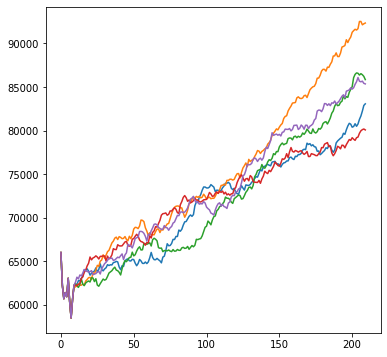

In [26]:
# each row has 5 columns with values all the same equivalent to one of init values
# every initial trajectory starts with same 10 initial values in a series given by actual BC data
values = np.broadcast_to(initial_values, (len(initial_values), num_samples))
print(values.shape)

# comes from the root-mean-square error calculation we did in topic 3
# DON'T KNOW WHERE THIS COMES FROM STILL
std_dev = 300

# how far to go into the future
trajectory_length = 200

for i in range(trajectory_length):
    # get last 4 values and multiply by the coefficients to get new value
    # each prediction is a row of 5
    next_prediction = coeffs @ values[-num_coeffs:,:]

    # add the noise/randomness of standard distribution values
    next_row = next_prediction + std_dev * np.random.randn(num_samples)

    # append it to the values matrix
    values = np.append(values, next_row.reshape(1, num_samples), axis=0)

_=plt.plot(values)

# 5.6 Kernal Density Estimation  

Instead of throwing darts at board and working out area of circle, throw a lot of trajectories of future prices into the world and going to cellect the image how they come out  

Then make a probability distribution function which is our best estimate of the probability distribution just as pi

Best estimate comse from 1000 trajectories and this is how they come out, get buest guess or % at trajectory  

Continous graph, gives probability density functions

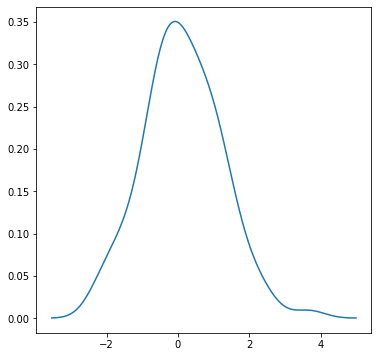

<AxesSubplot:ylabel='Density'>

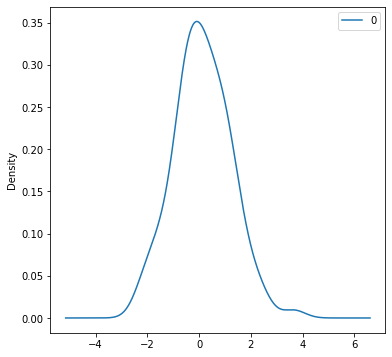

In [32]:
import statsmodels.api as sm
# stats models
dens = sm.nonparametric.KDEUnivariate(noise2[0])
dens.fit()
plt.plot(dens.support, dens.density)
plt.show()
# print(noise2[0])

# dataframe
pd.DataFrame(noise2[0]).plot.kde()